In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# Convert string representation to actual list, checking for NaN values first
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df[['job_title_short','job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [4]:
df_exploded = df.explode('job_skills')

In [6]:
df_exploded.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [7]:
df_exploded['job_skills'].value_counts()

job_skills
sql             384849
python          380909
aws             145381
azure           132527
r               130892
                 ...  
rubyon rails         1
visualbasic          1
msaccess             1
dingtalk             1
rocketchat           1
Name: count, Length: 252, dtype: int64

<Axes: xlabel='job_skills'>

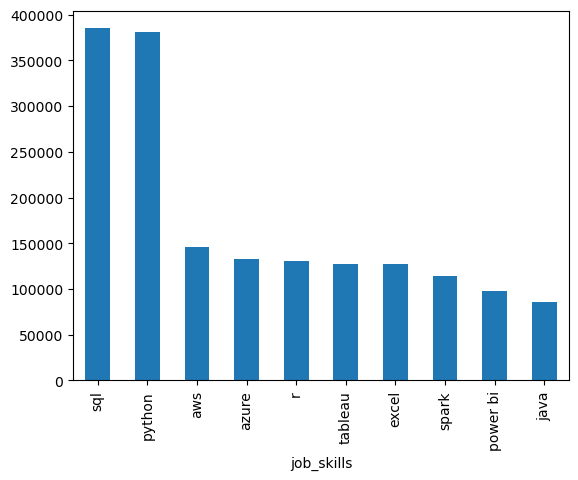

In [9]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [10]:
df_exploded.groupby(['job_skills', 'job_title_short']).size()

job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [13]:
#reorder the group by and assign to a variable
#however, this is now a series and we want a dataframe
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

In [14]:
#convert to a dataframe:
df_skills_count = skills_count.reset_index()

In [15]:
df_skills_count

,job_title_short,job_skills,0
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [16]:
#since count column above has a title of 0, we need to name it:
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [17]:
#want to sort
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [18]:
#Create variable that we can filter with
job_title = 'Data Analyst'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skill_final

,job_title_short,job_skills,skill_count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


<Axes: ylabel='job_skills'>

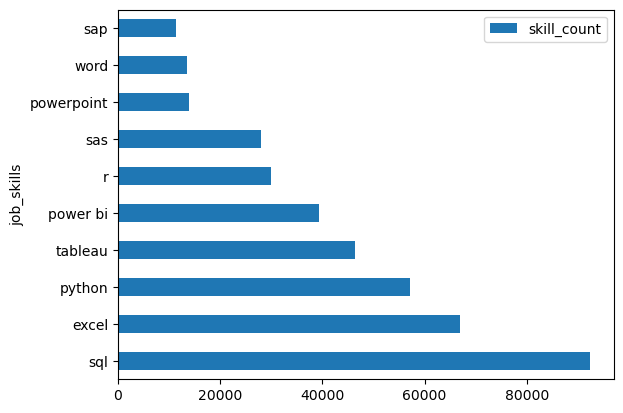

In [19]:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')

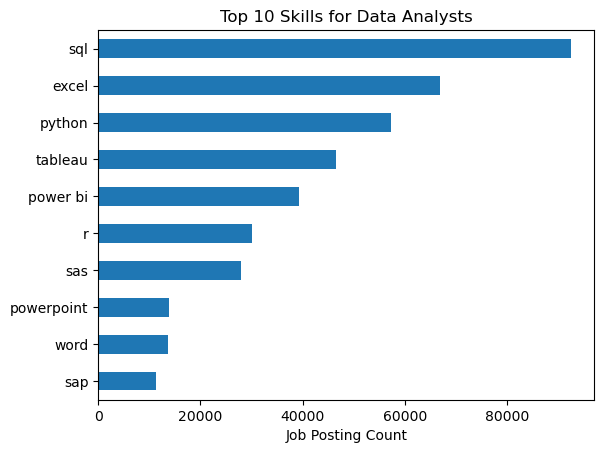

In [20]:
#clean up and sort the bar chart:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

🟨 Bar Plot of Top Skills for Cloud Engineers (2.11.1) - Problem
Pandas Explode
Problem Statement:
Using the ast library, clean up the job_skills column to be of the list data type in preparation for exploding this column.
NOTE: For future problems, it'll be assumed that you have done this step in preparation for exploding this column.
Explode the job_skills column in the DataFrame and create a bar plot using pandas of the top 10 most common skills for Cloud Engineer.
Add labels for the x-axis (label as 'Skills'), y-axis (label as 'Count') and a title (set as 'Top 10 Most Common Skills for Cloud Engineers') for the plot.

In [21]:
#Create variable that we can filter with
job_title = 'Cloud Engineer'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skill_final

,job_title_short,job_skills,skill_count
364,Cloud Engineer,python,3116
237,Cloud Engineer,aws,3075
238,Cloud Engineer,azure,2943
395,Cloud Engineer,sql,2227
317,Cloud Engineer,linux,1637
409,Cloud Engineer,terraform,1607
315,Cloud Engineer,kubernetes,1554
304,Cloud Engineer,java,1217
288,Cloud Engineer,gcp,1200
269,Cloud Engineer,docker,1152


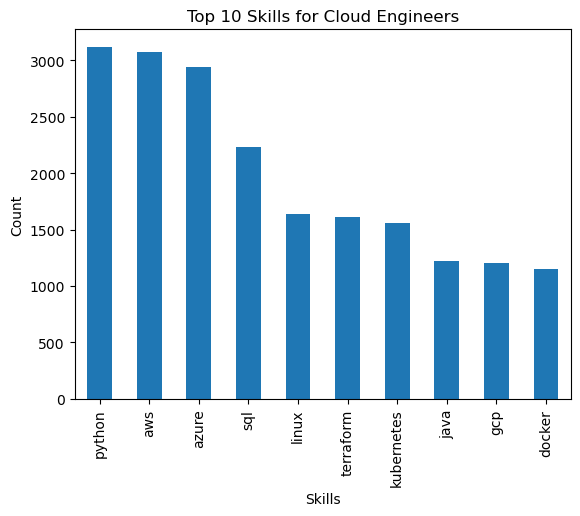

In [25]:
#clean up and sort the bar chart:
df_skill_final.plot(kind='bar', x='job_skills', y='skill_count')
#plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.legend().set_visible(False)
plt.show()

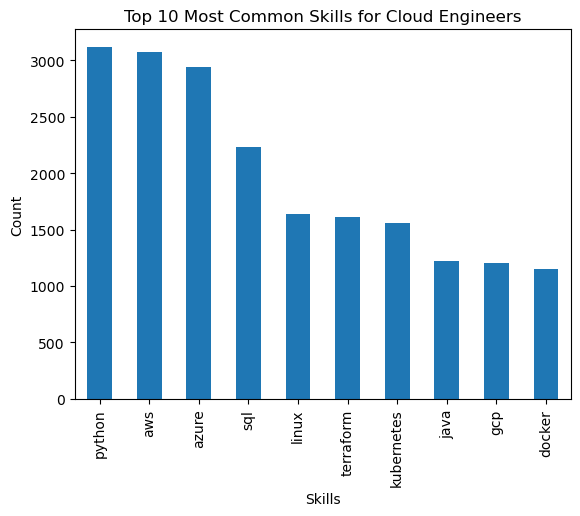

In [26]:
#Final Solution:
df_CE = df[df['job_title_short'] == 'Cloud Engineer']
df_exploded = df_CE.explode('job_skills')
skill_counts = df_exploded['job_skills'].value_counts().head(10)

skill_counts.plot(kind='bar')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 10 Most Common Skills for Cloud Engineers')
plt.show()

🟨 Average Salary by Skill (2.11.2) - Problem
Pandas Explode
Problem Statement:
Explode the job_skills column in the DataFrame and calculate the average salary for each skill. Display the top 5 skills with the highest average salary.

In [29]:
df_exploded = df.explode('job_skills')

In [31]:
df_exploded.groupby(['job_skills'])['salary_year_avg'].agg('mean')

job_skills
airflow       142255.967200
airtable      140615.340909
alteryx       112911.989678
angular       126330.310426
angular.js    127050.000000
                  ...      
wrike         101250.000000
wsl                     NaN
xamarin       121250.000000
yarn          111970.011239
zoom          127276.297468
Name: salary_year_avg, Length: 252, dtype: float64

In [32]:
df_exploded.groupby(['job_skills'])['salary_year_avg'].mean()

job_skills
airflow       142255.967200
airtable      140615.340909
alteryx       112911.989678
angular       126330.310426
angular.js    127050.000000
                  ...      
wrike         101250.000000
wsl                     NaN
xamarin       121250.000000
yarn          111970.011239
zoom          127276.297468
Name: salary_year_avg, Length: 252, dtype: float64

In [33]:
df_skills = df_exploded.groupby(['job_skills'])['salary_year_avg'].agg('mean')
df_skills

job_skills
airflow       142255.967200
airtable      140615.340909
alteryx       112911.989678
angular       126330.310426
angular.js    127050.000000
                  ...      
wrike         101250.000000
wsl                     NaN
xamarin       121250.000000
yarn          111970.011239
zoom          127276.297468
Name: salary_year_avg, Length: 252, dtype: float64

In [34]:
df_skills = df_skills.reset_index(name='average_salary')
df_skills

,job_skills,average_salary
0,airflow,142255.967200
1,airtable,140615.340909
2,alteryx,112911.989678
3,angular,126330.310426
4,angular.js,127050.000000
...,...,...
247,wrike,101250.000000
248,wsl,NaN
249,xamarin,121250.000000
250,yarn,111970.011239


In [36]:
df_skills = df_skills.sort_values(by='average_salary', ascending=False)
df_skills.head(5)

,job_skills,average_salary
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


In [37]:
#Final Solution:
df_exploded = df.explode('job_skills')
skill_salary_avg = df_exploded.groupby('job_skills')['salary_year_avg'].mean().reset_index()
skill_salary_avg = skill_salary_avg.sort_values(by='salary_year_avg', ascending=False).head()
skill_salary_avg

,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


🟥 Unique Skills Count (2.11.3) - Problem
Pandas Explode
Problem Statement:
Explode the job_skills column in the DataFrame and calculate the number of unique skills for each job posting. Display the first 5 rows of the resulting DataFrame with a new column num_unique_skills.

In [65]:
df_exploded = df.explode('job_skills')
df_exploded = df_exploded.groupby('job_title_short')['job_skills'].unique().reset_index(name='num_unique_skills')
df_exploded

,job_title_short,num_unique_skills
0,Business Analyst,"[excel, powerpoint, power bi, r, python, sql, ..."
1,Cloud Engineer,"[javascript, python, gcp, aws, selenium, node,..."
2,Data Analyst,"[r, python, sql, nosql, power bi, tableau, php..."
3,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
4,Data Scientist,"[sql, python, r, mongodb, sql server, azure, p..."
5,Machine Learning Engineer,"[python, r, sql, pytorch, pandas, scala, pyspa..."
6,Senior Data Analyst,"[sql, python, None, excel, sas, r, tableau, sn..."
7,Senior Data Engineer,"[None, sql, python, java, sql server, gcp, big..."
8,Senior Data Scientist,"[excel, None, python, aws, gcp, go, oracle, sc..."
9,Software Engineer,"[sql, power bi, bash, python, aws, linux, splu..."


In [66]:
df_exploded = df_exploded.explode('num_unique_skills')

In [69]:
df_exploded.groupby('job_title_short')['num_unique_skills'].nunique().reset_index(name='num_unique_skills').sort_values(by='num_unique_skills', ascending=False).head(10)

,job_title_short,num_unique_skills
3,Data Engineer,239
9,Software Engineer,239
4,Data Scientist,237
2,Data Analyst,235
7,Senior Data Engineer,226
0,Business Analyst,223
5,Machine Learning Engineer,222
8,Senior Data Scientist,215
1,Cloud Engineer,213
6,Senior Data Analyst,207


In [70]:
#Final Solution:
df_exploded = df.explode('job_skills')
unique_skills_count = df_exploded.groupby('job_title_short')['job_skills'].nunique().reset_index(name='num_unique_skills')
unique_skills_count.columns = ['job_title_short', 'num_unique_skills']
unique_skills_count.sort_values(by='num_unique_skills', ascending=False).head(10)

,job_title_short,num_unique_skills
3,Data Engineer,239
9,Software Engineer,239
4,Data Scientist,237
2,Data Analyst,235
7,Senior Data Engineer,226
0,Business Analyst,223
5,Machine Learning Engineer,222
8,Senior Data Scientist,215
1,Cloud Engineer,213
6,Senior Data Analyst,207
